In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
mpl.rcParams['figure.figsize']=(16,9)
pd.set_option('display.max_rows',500)

In [3]:
small_data=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')
small_data.sort_values('date',ascending=True)

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0
5,2020-01-27,0,0,5,1
6,2020-01-28,0,0,5,4
7,2020-01-29,0,0,5,4
8,2020-01-30,1,0,5,4
9,2020-01-31,1,2,7,5


## SIR

In [4]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


In [5]:
N0=10000000
beta=.4
gamma=.1
I0=small_data.Germany[35];
S0=N0-I0
R0=0

In [6]:

SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_t in np.arange(200):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

In [8]:
for time_step in np.arange(100):
    delta_vec=SIR_model(SIR,beta,gamma)
    SIR=SIR+delta_vec
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],'infected':SIR[1],'recovered':SIR[2]}, ignore_index=True)

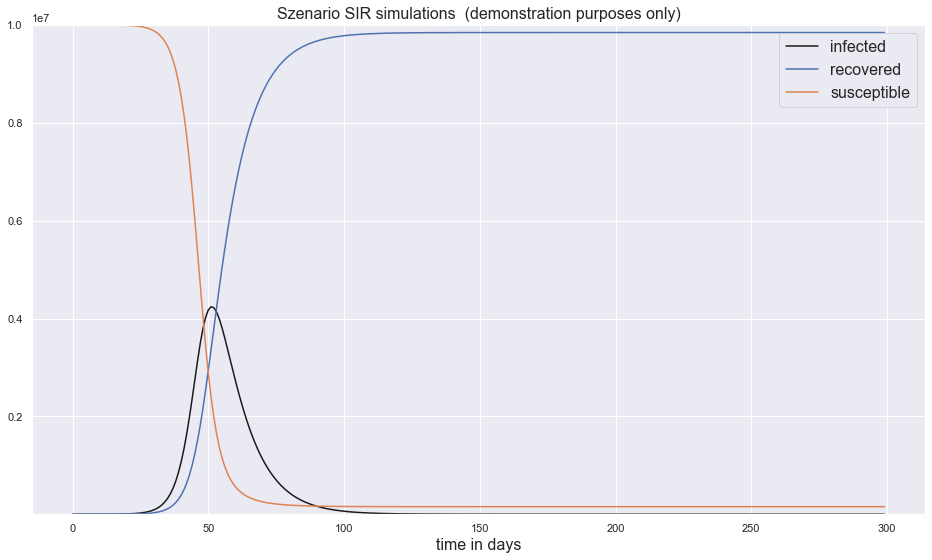

In [13]:
#pg_rate.susceptible

fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 10000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [13]:
pg_rates

,susceptible,infected,recovered
0,2.933333,5.666667,3.400000
1,2.379259,5.654074,3.966667
2,1.930842,5.537084,4.532074
3,1.574468,5.339750,5.085782
4,1.294226,5.086017,5.619757
5,1.074811,4.796830,6.128359
6,0.902954,4.489003,6.608042
7,0.767842,4.175215,7.056942
8,0.660979,3.864557,7.474464
9,0.575832,3.563248,7.860920


In [57]:
from scipy import optimize
from scipy import integrate
small_data

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0
5,2020-01-27,0,0,5,1
6,2020-01-28,0,0,5,4
7,2020-01-29,0,0,5,4
8,2020-01-30,1,0,5,4
9,2020-01-31,1,2,7,5


In [55]:
ydata=np.array(small_data.India[45:])
t=np.arange(len(ydata))
print(ydata.shape, t.shape)
ydata

(191,) (191,)


array([     34,      39,      43,      56,      62,      73,      82,
           102,     113,     119,     142,     156,     194,     244,
           330,     396,     499,     536,     657,     727,     887,
           987,    1024,    1251,    1397,    1998,    2543,    2567,
          3082,    3588,    4778,    5311,    5916,    6725,    7598,
          8446,    9205,   10453,   11487,   12322,   13430,   14352,
         15722,   17615,   18539,   20080,   21370,   23077,   24530,
         26283,   27890,   29451,   31324,   33062,   34863,   37257,
         39699,   42505,   46437,   49400,   52987,   56351,   59695,
         62808,   67161,   70768,   74292,   78055,   81997,   85784,
         90648,   95698,  100328,  106475,  112028,  118226,  124794,
        131423,  138536,  144950,  150793,  158086,  165386,  173491,
        181827,  190609,  198370,  207191,  216824,  226713,  236184,
        246622,  257486,  265928,  276146,  286605,  297535,  308993,
        320922,  332

In [66]:
def SIR_model(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt


In [67]:

def fit_odeint(x,beta,gamma):
    return integrate.odeint(SIR_model,(S0,I0,R0),t, args=(beta, gamma))

In [68]:
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.4

In [ ]:
popt,pcov=optimize.curve_fit(f=fit_odeint, xdata=t, ydata=ydata)
perr=np.sqrt(np.diag(pcov))
print('SD Erros:',str(perr),'start infect:',ydata[0])
print('Optimal Parameters: bet=', popt[0],"and gamma=",popt[1])


In [36]:
popt=[0.4,0.1]

fitted=fit_odeint(t,*popt)

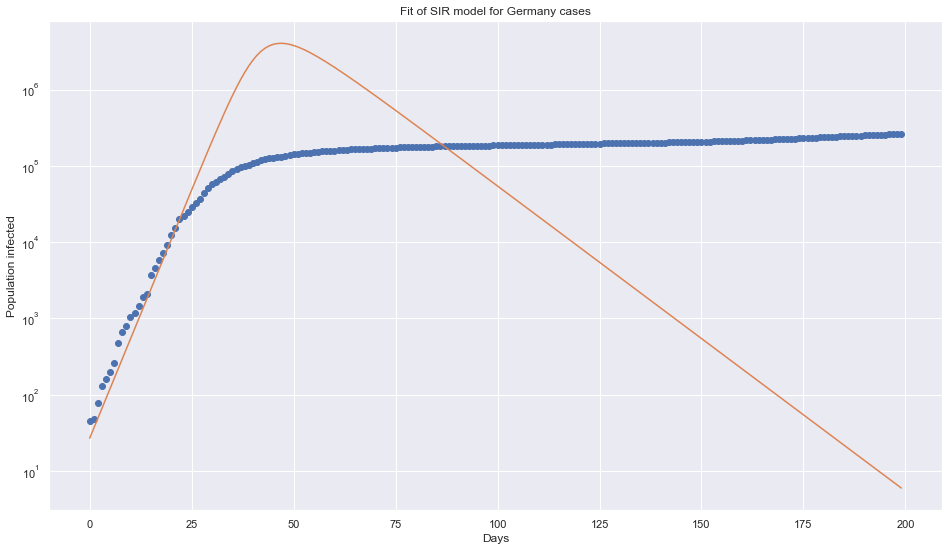

Optimal parameters: beta = 0.28729497079186955  and gamma =  0.2204890205932983
Basic Reproduction Number R0  1.302989917678476
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [37]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")